In [146]:
!pip install nltk

In [147]:
import pandas as pd
import numpy as np


In [148]:
# df = pd.read_csv('elon_musk_tweets.csv')
df = pd.read_csv('elonmusk.csv')
df['text']=df['Tweets']

In [149]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweets,text
0,2022-09-12 05:44:11+00:00,1524,Twitter for iPhone,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...
1,2022-09-12 05:43:02+00:00,19631,Twitter for iPhone,@cb_doge @Tesla @mayemusk Still doing same thi...,@cb_doge @Tesla @mayemusk Still doing same thi...
2,2022-09-12 04:19:57+00:00,9221,Twitter for iPhone,Looks good to roll out to all Tesla owners wit...,Looks good to roll out to all Tesla owners wit...
3,2022-09-12 03:25:03+00:00,944,Twitter for iPhone,@Tesla__Mania @WholeMarsBlog That is probably ...,@Tesla__Mania @WholeMarsBlog That is probably ...
4,2022-09-12 01:48:49+00:00,3710,Twitter for iPhone,@WholeMarsBlog Real-world validation &amp; bil...,@WholeMarsBlog Real-world validation &amp; bil...


In [150]:
df.tail()


,Date Created,Number of Likes,Source of Tweet,Tweets,text
17432,2011-12-03 08:22:07+00:00,51,Twitter for iPhone,That was a total non sequitur btw,That was a total non sequitur btw
17433,2011-12-03 08:20:28+00:00,53,Twitter for iPhone,"Great Voltaire quote, arguably better than Twa...","Great Voltaire quote, arguably better than Twa..."
17434,2011-12-01 10:29:04+00:00,75,Twitter Web Client,I made the volume on the Model S http://t.co/w...,I made the volume on the Model S http://t.co/w...
17435,2011-12-01 09:55:11+00:00,189,Twitter Web Client,Went to Iceland on Sat to ride bumper cars on ...,Went to Iceland on Sat to ride bumper cars on ...
17436,2010-06-04 18:31:57+00:00,6042,Twitter Web Client,"Please ignore prior tweets, as that was someon...","Please ignore prior tweets, as that was someon..."


In [151]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df['text'])

In [152]:
len(cv.get_feature_names_out())

10057

In [153]:
import random

for i in range(15):
    random_index = random.randint(0,len(cv.get_feature_names_out()))
    random_feature = cv.get_feature_names_out()[random_index]
    print(random_feature)

nasa_lsp
needs
listened
lex
valves
janeidyeve
2013
vibes
antvenom
attachments
buried
developments
linustech
internally
estimate


In [154]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=15,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=15, random_state=42)

In [155]:
len(LDA.components_)

15

In [156]:
LDA.components_

array([[ 5.0576383 ,  0.06666667,  0.06666667, ...,  0.06666667,
         0.06666667,  0.06666667],
       [ 2.14674552,  0.06666688,  0.06666667, ...,  0.06666667,
         1.06666606,  0.06666667],
       [ 0.06666682,  0.06666678,  0.06666667, ...,  0.06666667,
         0.06666667,  0.06666667],
       ...,
       [ 2.71147551,  0.06666667,  0.06666679, ...,  0.06666667,
         0.06666667,  0.06666667],
       [11.20669392,  0.06666667,  0.06666667, ...,  0.06666669,
         0.06666697,  0.06666667],
       [11.25597625,  0.06666689,  2.06666655, ...,  0.06666667,
         0.06666667,  0.06666667]])

In [157]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index+1}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1
['yeah', 'kristennetten', 'dogeofficialceo', 'know', 'evafoxu', 'really', 'wish', 'twitter', 'great', 'makes', 'ppathole', 'rainmaker1973', 'thought', 'sense', 'pretty', 'thing', 'agreed', 'just', 'time', 'times', 'make', 'jack', 'slashdot', 'https', 'amp']


THE TOP 15 WORDS FOR TOPIC #2
['100', 'production', 'cars', 'supercharger', 'end', 'point', 'game', 'engineering', 'make', 'autopilot', 'software', 'just', 'http', 'idea', 'year', 'car', 'new', 'https', 'amp', 'great', 'good', 'soon', 'model', 'coming', 'tesla']


THE TOP 15 WORDS FOR TOPIC #3
['make', 'option', 'literally', 'wholemarsblog', 'good', 'just', 'people', 'grimezsz', 'earth', 'price', 'looks', 'don', 'right', 'ppathole', 'teslaownerssv', 'amp', 'https', 'tesla', 'sounds', 'mars', 'lexfridman', 'fredericlambert', 'like', 'yeah', 'exactly']


THE TOP 15 WORDS FOR TOPIC #4
['tunnels', 'public', 've', 'rock', 'heard', 'stevenmarkryan', 'just', 'irony', 'heydave7', 'la', 'like', 'ppathole', 'bo

In [158]:
topic_results = LDA.transform(dtm)

In [159]:
df['topic'] = topic_results.argmax(axis=1)+1

In [160]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweets,text,topic
0,2022-09-12 05:44:11+00:00,1524,Twitter for iPhone,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,1
1,2022-09-12 05:43:02+00:00,19631,Twitter for iPhone,@cb_doge @Tesla @mayemusk Still doing same thi...,@cb_doge @Tesla @mayemusk Still doing same thi...,1
2,2022-09-12 04:19:57+00:00,9221,Twitter for iPhone,Looks good to roll out to all Tesla owners wit...,Looks good to roll out to all Tesla owners wit...,7
3,2022-09-12 03:25:03+00:00,944,Twitter for iPhone,@Tesla__Mania @WholeMarsBlog That is probably ...,@Tesla__Mania @WholeMarsBlog That is probably ...,3
4,2022-09-12 01:48:49+00:00,3710,Twitter for iPhone,@WholeMarsBlog Real-world validation &amp; bil...,@WholeMarsBlog Real-world validation &amp; bil...,9


<Axes: xlabel='topic'>

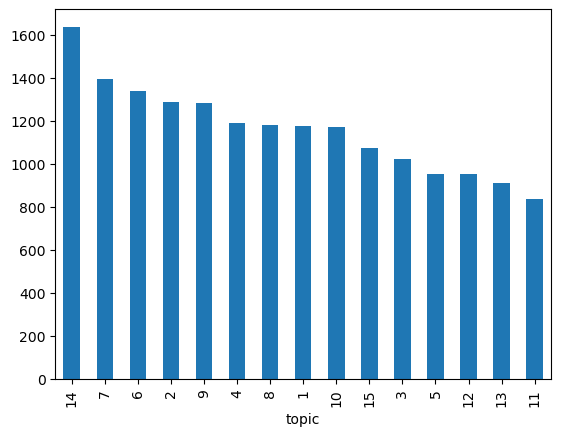

In [161]:
df['topic'].value_counts().plot.bar()

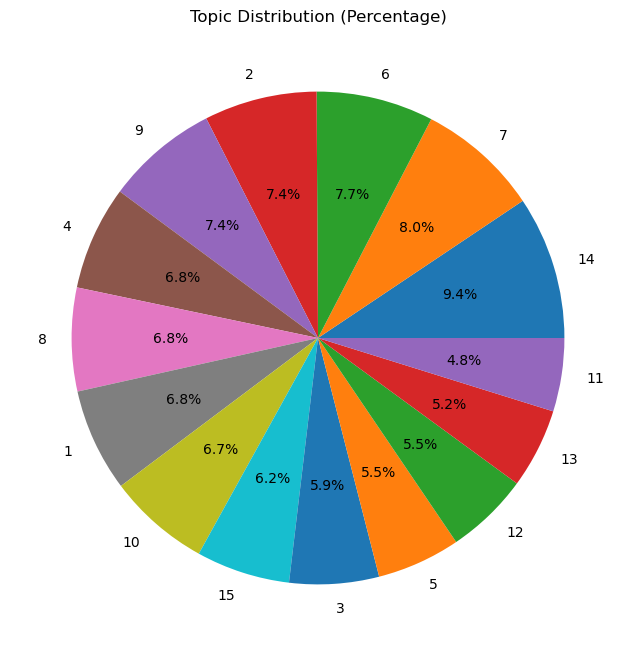

In [162]:
import matplotlib.pyplot as plt
df['topic'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Topic Distribution (Percentage)')
plt.ylabel('')
plt.show()


In [163]:
!pip install twython
import nltk 
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sahanajprakash/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [164]:
for i in range (10,25) : 
    print(df.loc[i]['text'])
    print()
    print(SIA.polarity_scores(df.loc[i]['text']))
    print()
    print('----------------------------------------')


@Austen Instagram is an envy amplifier

{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.2732}

----------------------------------------
@DirtyTesLa @WholeMarsBlog Yes

{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}

----------------------------------------
@WholeMarsBlog Team found a bug causing an 8% delay in detecting pedestrians at &gt;50m. That’s been fixed, so rolling out tonight.

{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'compound': -0.3182}

----------------------------------------
@EvaFoxU 🔥🤣

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

----------------------------------------
@chicago_glenn @stevenmarkryan @WholeMarsBlog That’s pretty accurate

{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4939}

----------------------------------------
@stevenmarkryan @WholeMarsBlog Haha

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}

----------------------------------------
Astronomy too

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [165]:
df['polarity_score'] = df['text'].apply(lambda text: SIA.polarity_scores(text) )

In [166]:
df['compound'] = df['polarity_score'].apply(lambda dict: dict['compound'])

In [167]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweets,text,topic,polarity_score,compound
0,2022-09-12 05:44:11+00:00,1524,Twitter for iPhone,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2022-09-12 05:43:02+00:00,19631,Twitter for iPhone,@cb_doge @Tesla @mayemusk Still doing same thi...,@cb_doge @Tesla @mayemusk Still doing same thi...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2022-09-12 04:19:57+00:00,9221,Twitter for iPhone,Looks good to roll out to all Tesla owners wit...,Looks good to roll out to all Tesla owners wit...,7,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",0.4926
3,2022-09-12 03:25:03+00:00,944,Twitter for iPhone,@Tesla__Mania @WholeMarsBlog That is probably ...,@Tesla__Mania @WholeMarsBlog That is probably ...,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,2022-09-12 01:48:49+00:00,3710,Twitter for iPhone,@WholeMarsBlog Real-world validation &amp; bil...,@WholeMarsBlog Real-world validation &amp; bil...,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [169]:
# save to csv after cleaning etc
new_df = df
new_df['Date'] = pd.to_datetime(df['Date Created'])

new_df['Date'] = new_df['Date'].dt.strftime('%Y-%m-%d')
new_df = new_df[['Date', 'compound']]

# Group by 'date' and calculate the mean of 'compound'
grouped = df.groupby('Date')['compound'].mean()

# Convert groupby object back to DataFrame
result_df = grouped.reset_index()

# Convert 'date' to datetime explicitly using .loc
result_df.loc[:, 'Date'] = pd.to_datetime(result_df['Date'])

# Create a complete date range
full_date_range = pd.date_range(start='2020-03-16', end=result_df['Date'].max())

# Reindex the DataFrame to include all dates
result_df = result_df.set_index('Date').reindex(full_date_range, fill_value=0).reset_index()

# Rename columns back to their original names
result_df.columns = ['Date', 'compound']



result_df.to_csv('sentiment_scores.csv')

/Users/sahanajprakash/Repos/python-data/env/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [ ]:
count = 0

while count < 15:
    random_index = random.randint(0, len(df) - 1)
    
    if pd.isna(df['Sentiment Category'][random_index]):
        continue
    print('//////////////////////////////////////////////////')
    print(df['text'][random_index])
    print('\n')
    print(df['Sentiment Category'][random_index])
    
    count += 1 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Sentiment Category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sentiment Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
sentiment_counts = df['Sentiment Category'].value_counts()
sentiment_percentage = sentiment_counts / sentiment_counts.sum() * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentage, labels=sentiment_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
plt.title('Sentiment Category Distribution (%)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import numpy as np
from PIL import Image

In [ ]:
texts = []
for text in df['text']:
    texts.append(text)
texts = " ".join(texts)

print(texts[:10000])